In [89]:
import pandas as pd
from pycaret.classification import *

In [90]:
# charger les données d'entraînement
df_train = pd.read_csv('emotions_train.csv')

#charger les données de test
test_data = pd.read_csv('emotions_test.csv')

#affichage des premières lignes de chaque dataset
print("Train:")
print(df_train.head())

print("")
print("######################################################################")
print("######## * ML IN THE CLOUDS * ######### * ML IN THE CLOUDS * #########")
print("######################################################################")
print("Test:")
print("")


print(test_data.head())


Train:
                                                Text  Emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger

######################################################################
######## * ML IN THE CLOUDS * ######### * ML IN THE CLOUDS * #########
######################################################################
Test:

     tweet_id   sentiment       author  \
0  1956967341       empty   xoshayzers   
1  1956967666     sadness    wannamama   
2  1956967696     sadness    coolfunky   
3  1956967789  enthusiasm  czareaquino   
4  1956968416     neutral    xkilljoyx   

                                             content  
0  @tiffanylue i know  i was listenin to bad habi...  
1  Layin n bed with a headache  ughhh

In [91]:
# Recherche de valeurs manquantes
df_train.isna().sum()

Text       0
Emotion    0
dtype: int64

In [92]:
duplicata = df_train.Text.duplicated()

- Il y a des données dupliquées. 

In [93]:
len(df_train[duplicata])

54

- Il y a peu de données dupliquées soit 0.02% , donc nous allons les supprimer.

In [94]:
df_train_unique = df_train.drop_duplicates(subset='Text')
# Nombre de caractère present dans chaque phrase
nb_caracteres = df_train_unique['Text'].str.len()
nb_caracteres

0         23
1        108
2         48
3         92
4         20
        ... 
21454     36
21455     91
21456     36
21457     50
21458     31
Name: Text, Length: 21405, dtype: int64

<Axes: >

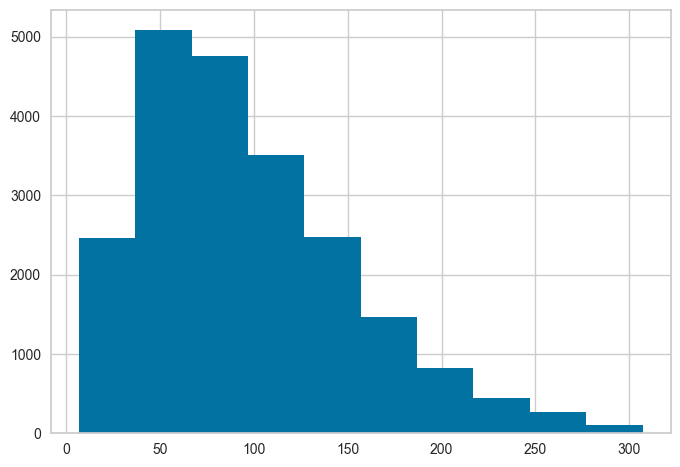

In [95]:
nb_caracteres .hist()

In [96]:
# Recherche du nombre de mots présents dans les phrases
nb_de_mots = df_train_unique['Text'].str.split().map(lambda x: len(x))
nb_de_mots

0         4
1        21
2        10
3        18
4         4
         ..
21454     7
21455    13
21456     6
21457     8
21458     7
Name: Text, Length: 21405, dtype: int64

<Axes: >

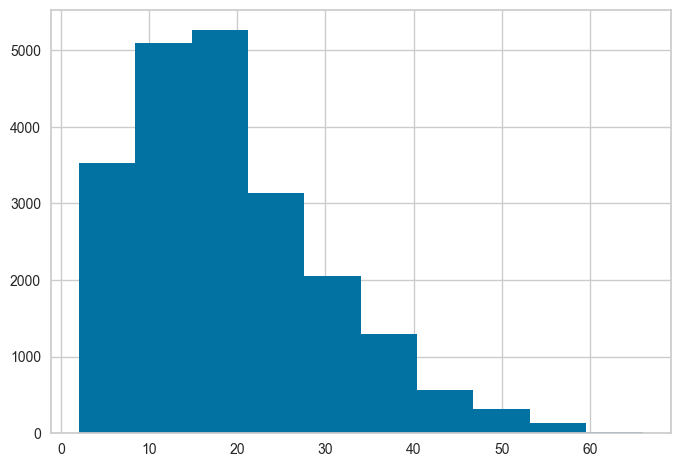

In [97]:
nb_de_mots.hist()

In [98]:
# Moyenne des longueurs des mots
import numpy as np
moyenne_longueur_mots = df_train_unique['Text'].str.split().apply(lambda x : [len(i) for i in x]). map(lambda x: np.mean(x))
moyenne_longueur_mots

0        5.000000
1        4.190476
2        3.900000
3        4.166667
4        4.250000
           ...   
21454    4.285714
21455    6.076923
21456    5.166667
21457    5.375000
21458    3.571429
Name: Text, Length: 21405, dtype: float64

<Axes: >

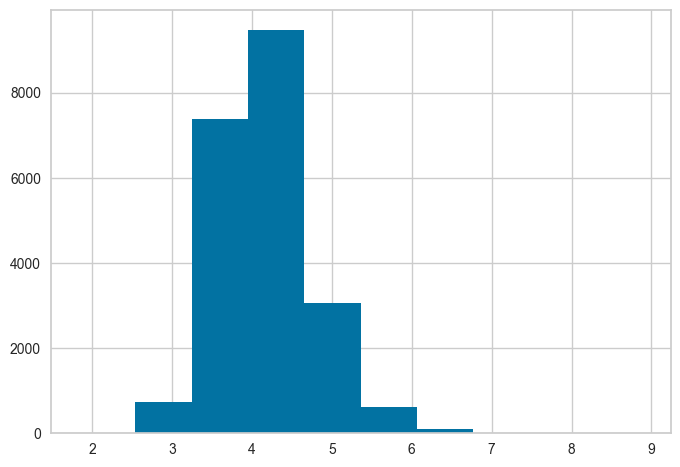

In [99]:
moyenne_longueur_mots.hist()

In [100]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df_train_unique['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white', min_font_size = 10).generate(text)

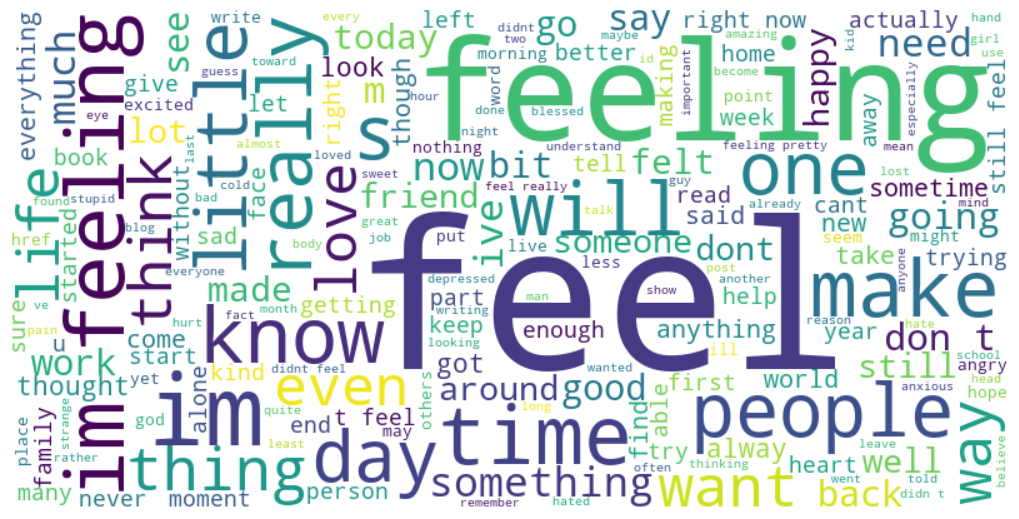

In [101]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad = 0) 
plt.show()

In [102]:
df_train_unique.Emotion.unique()
import plotly.graph_objects as go

# Répartition du target

fig = go.Figure([go.Bar(x=df_train_unique['Emotion'].value_counts().index, y=df_train_unique['Emotion'].value_counts().tolist())])
fig.update_layout(
    title="Répartition des sentiments",
    xaxis_title="Emotions",
    yaxis_title="Valeurs")
fig.show()

In [103]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cheri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [104]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cheri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cheri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [105]:
df_train_unique.Text
df = df_train_unique.copy()
def text_processing(text):
     #Charger les stop-words en anglais
    stop_words = set(stopwords.words('english'))
   

    # Initialiser le lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Appliquer la tokenisation à tous les textes
    tokens = word_tokenize(text.lower())

    # Supprimer les ponctuations
    tokens = [word for word in tokens if word not in string.punctuation]
    

    # Supprimer les stop-words
    tokens = [word for word in tokens if word not in stop_words]
    

    # Appliquer la lemmatisation à tous les tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    tokens = ' '.join(tokens)
   

    return tokens
    
df['Texts'] = df['Text'].apply(text_processing)
df.head()

,Text,Emotion,Texts
0,i didnt feel humiliated,sadness,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,anger,feeling grouchy


In [106]:

from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessing du text
vectorizer = TfidfVectorizer(max_features=100) 
text_features = vectorizer.fit_transform(df['Texts']).toarray()
text_features_df = pd.DataFrame(text_features, columns=vectorizer.get_feature_names_out())
df = df.drop(columns=['Texts']).reset_index(drop=True)
df = pd.concat([df, text_features_df], axis=1)


#  Splittage 80/20
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=123, stratify=df['Emotion'])


#setup PyCaret Environment
clf = setup(data=train_df, 
            target='Emotion',  
            session_id=123, 
            html=False,
            log_experiment=False,
            experiment_name=None, #text_features=['Texts']
            fold=3,
            use_gpu=True)

# Entraîner et comparer les modèles
best_model = compare_models()  

# Afficher les métriques du meilleur modèle
evaluate_model(best_model)

# Afficher les métriques de tous les modèles
models = pull()
print(models)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

                                    Model  Accuracy     AUC  Recall   Prec.  \
ridge                    Ridge Classifier    0.3456  0.0000  0.3456  0.2680   
lr                    Logistic Regression    0.3275  0.0000  0.3275  0.1326   
nb                            Naive Bayes    0.3274  0.5000  0.3274  0.1072   
dt               Decision Tree Classifier    0.3274  0.5000  0.3274  0.1072   
rf               Random Forest Classifier    0.3274  0.5093  0.3274  0.1072   
qda       Quadratic Discriminant Analysis    0.3274  0.0000  0.3274  0.1072   
ada                  Ada Boost Classifier    0.3274  0.0000  0.3274  0.1072   
gbc          Gradient Boosting Classifier    0.3274  0.0000  0.3274  0.1072   
lda          Linear Discriminant Analysis    0.3274  0.0000  0.3274  0.1072   
xgboost         Extreme Gradient Boosting    0.3274  0.5316  0.3274  0.1072   
lightgbm  Light Gradient Boosting Machine    0.3274  0.5278  0.3274  0.1072   
dummy                    Dummy Classifier    0.3274 

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

                                    Model  Accuracy     AUC  Recall   Prec.  \
ridge                    Ridge Classifier    0.3456  0.0000  0.3456  0.2680   
lr                    Logistic Regression    0.3275  0.0000  0.3275  0.1326   
nb                            Naive Bayes    0.3274  0.5000  0.3274  0.1072   
dt               Decision Tree Classifier    0.3274  0.5000  0.3274  0.1072   
rf               Random Forest Classifier    0.3274  0.5093  0.3274  0.1072   
qda       Quadratic Discriminant Analysis    0.3274  0.0000  0.3274  0.1072   
ada                  Ada Boost Classifier    0.3274  0.0000  0.3274  0.1072   
gbc          Gradient Boosting Classifier    0.3274  0.0000  0.3274  0.1072   
lda          Linear Discriminant Analysis    0.3274  0.0000  0.3274  0.1072   
xgboost         Extreme Gradient Boosting    0.3274  0.5316  0.3274  0.1072   
lightgbm  Light Gradient Boosting Machine    0.3274  0.5278  0.3274  0.1072   
dummy                    Dummy Classifier    0.3274 

In [109]:
# evaluer sur le set de test
predictions = predict_model(best_model, data=test_df)
metrics = get_metrics()
print(metrics)


              Model  Accuracy  AUC  Recall   Prec.     F1   Kappa     MCC
0  Ridge Classifier    0.3434    0  0.3434  0.2388  0.262  0.0456  0.0511
                Name Display Name  \
ID                                  
acc         Accuracy     Accuracy   
auc              AUC          AUC   
recall        Recall       Recall   
precision  Precision        Prec.   
f1                F1           F1   
kappa          Kappa        Kappa   
mcc              MCC          MCC   

                                              Score Function  \
ID                                                             
acc          <function accuracy_score at 0x0000025C70099080>   
auc        <pycaret.internal.metrics.BinaryMulticlassScor...   
recall     <pycaret.internal.metrics.BinaryMulticlassScor...   
precision  <pycaret.internal.metrics.BinaryMulticlassScor...   
f1         <pycaret.internal.metrics.BinaryMulticlassScor...   
kappa      <function cohen_kappa_score at 0x0000025C70099...   
mcc   